In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('../../thesis/references/TestAccurracy.csv', sep=';')
df.head()

,id,set,year,onset_date,y_true,pred_date,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest,error_abs_yearly
0,34,test,1985,30.05.1985,1,05/29,1.24,0.2358,0.2358,-0.05,-1.0528,1.0528,3.0624
1,34,test,1985,30.05.1985,2,05/28,1.56,-0.4440,0.4440,0.07,-1.9341,1.9341,3.0624
2,34,test,1985,30.05.1985,3,05/27,2.07,-0.9344,0.9344,0.88,-2.1163,2.1163,3.0624
3,34,test,1985,30.05.1985,4,05/26,3.14,-0.8569,0.8569,1.91,-2.0944,2.0944,3.0624
4,34,test,1985,30.05.1985,5,05/25,4.26,-0.7444,0.7444,2.51,-2.4933,2.4933,3.0624


In [4]:
df = df.sort_values(by='pred_date')

In [5]:
df.isna().sum()

id                  0
set                 0
year                0
onset_date          0
y_true              0
pred_date           0
y_pred_best         0
error_best          0
error_abs_best      0
y_pred_latest       0
error_latest        0
error_abs_latest    0
error_abs_yearly    0
dtype: int64

In [14]:
year_groups = df[df['id'] > 31].groupby(['set', 'year']).mean().reset_index()
year_groups

,set,year,id,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest,error_abs_yearly
0,dev,1980,33.5,15.5,14.971750,-0.528055,2.383538,16.263917,0.763852,1.775763,2.556529
1,dev,1990,33.5,15.5,21.568833,6.068689,6.106184,27.244917,11.744675,11.744675,6.106175
2,dev,2000,33.5,15.5,10.730167,-4.769117,4.832505,12.328250,-3.172198,3.530083,4.832500
3,dev,2010,33.5,15.5,19.563417,4.063228,5.682753,21.540083,6.040194,6.390097,5.682750
4,dev,2016,33.5,15.5,11.433667,-4.066072,4.171243,11.983250,-3.516963,3.866602,4.171250
5,test,1985,33.5,15.5,11.940917,-3.559313,3.567173,14.510417,-0.990053,1.343998,3.567200
6,test,1995,33.5,15.5,12.556500,-2.943632,4.335487,14.857417,-0.642520,2.828915,4.335475
7,test,2003,33.5,15.5,12.491833,-3.008508,3.322287,13.189667,-2.310393,2.680657,3.322275
8,test,2004,33.5,15.5,16.991083,1.490302,3.374972,18.843000,3.342739,3.621474,3.374975
9,test,2005,33.5,15.5,12.295250,-3.204708,4.261815,12.527167,-2.972266,3.623348,4.261825


In [7]:
df.groupby(['onset_date']).mean()

,id,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest,error_abs_yearly
onset_date,,,,,,,,,,
01.06.2013,29.5,2013.0,15.5,18.851500,3.351878,4.423040,21.089000,5.589216,5.589536,4.423050
03.06.2000,33.5,2000.0,15.5,10.730167,-4.769117,4.832505,12.328250,-3.172198,3.530083,4.832500
04.06.1980,33.5,1980.0,15.5,14.971750,-0.528055,2.383538,16.263917,0.763852,1.775763,2.556529
05.06.2012,29.5,2012.0,15.5,16.786250,1.285964,3.466604,17.622417,2.122094,2.360508,3.466600
05.06.2015,31.5,2015.0,15.5,15.116875,-0.383021,2.641088,15.269833,-0.230077,2.426806,2.641088
06.06.2014,31.5,2014.0,15.5,18.174542,2.674610,4.097070,18.808750,3.308847,4.223142,4.097075
07.06.2005,33.5,2005.0,15.5,12.295250,-3.204708,4.261815,12.527167,-2.972266,3.623348,4.261825
08.06.2007,29.5,2007.0,15.5,5.286917,-10.213093,10.213093,4.453250,-11.046916,11.046916,9.822760
08.06.2016,31.5,2016.0,15.5,12.186375,-3.313863,3.698482,13.117458,-2.382558,2.812397,3.698487


In [8]:
df.groupby(['set']).mean()

,id,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest,error_abs_yearly
set,,,,,,,,,,
dev,31.722222,2002.888889,15.5,14.747426,-0.752379,5.230338,16.513250,1.013109,6.075128,5.206188
test,31.500000,2009.125000,15.5,15.476375,-0.023792,3.680237,16.745005,1.245043,3.179153,3.680241


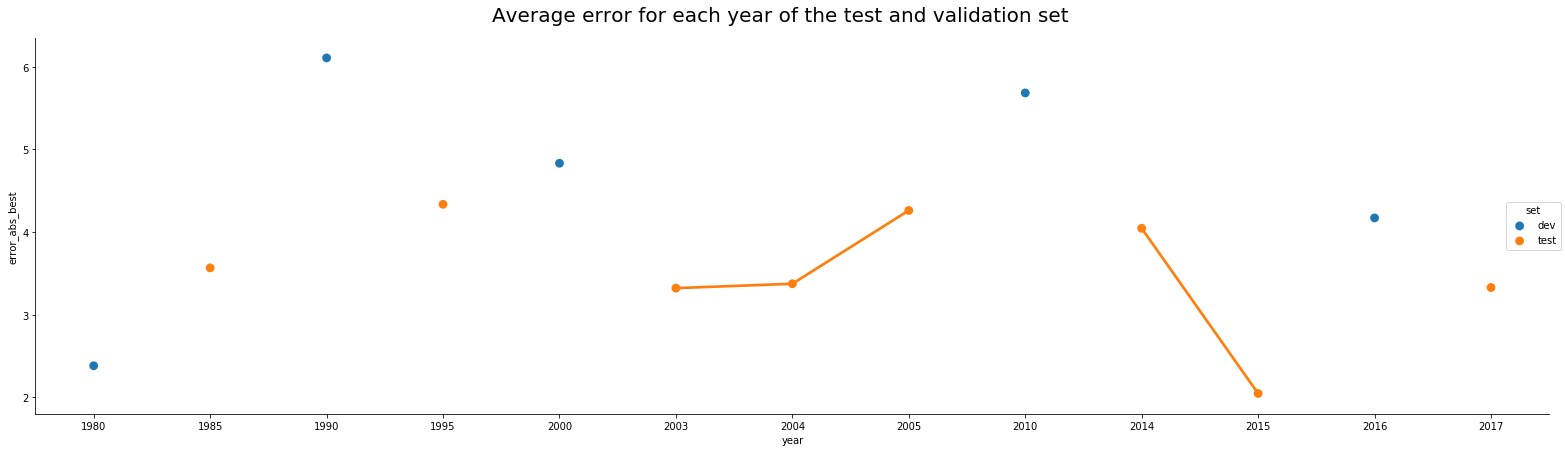

In [17]:
g = sns.factorplot(data=year_groups, x='year', y='error_abs_best', hue='set', aspect=3.5, size=6)

ttl = g.fig.suptitle('Average error for each year of the test and validation set', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_years.png')

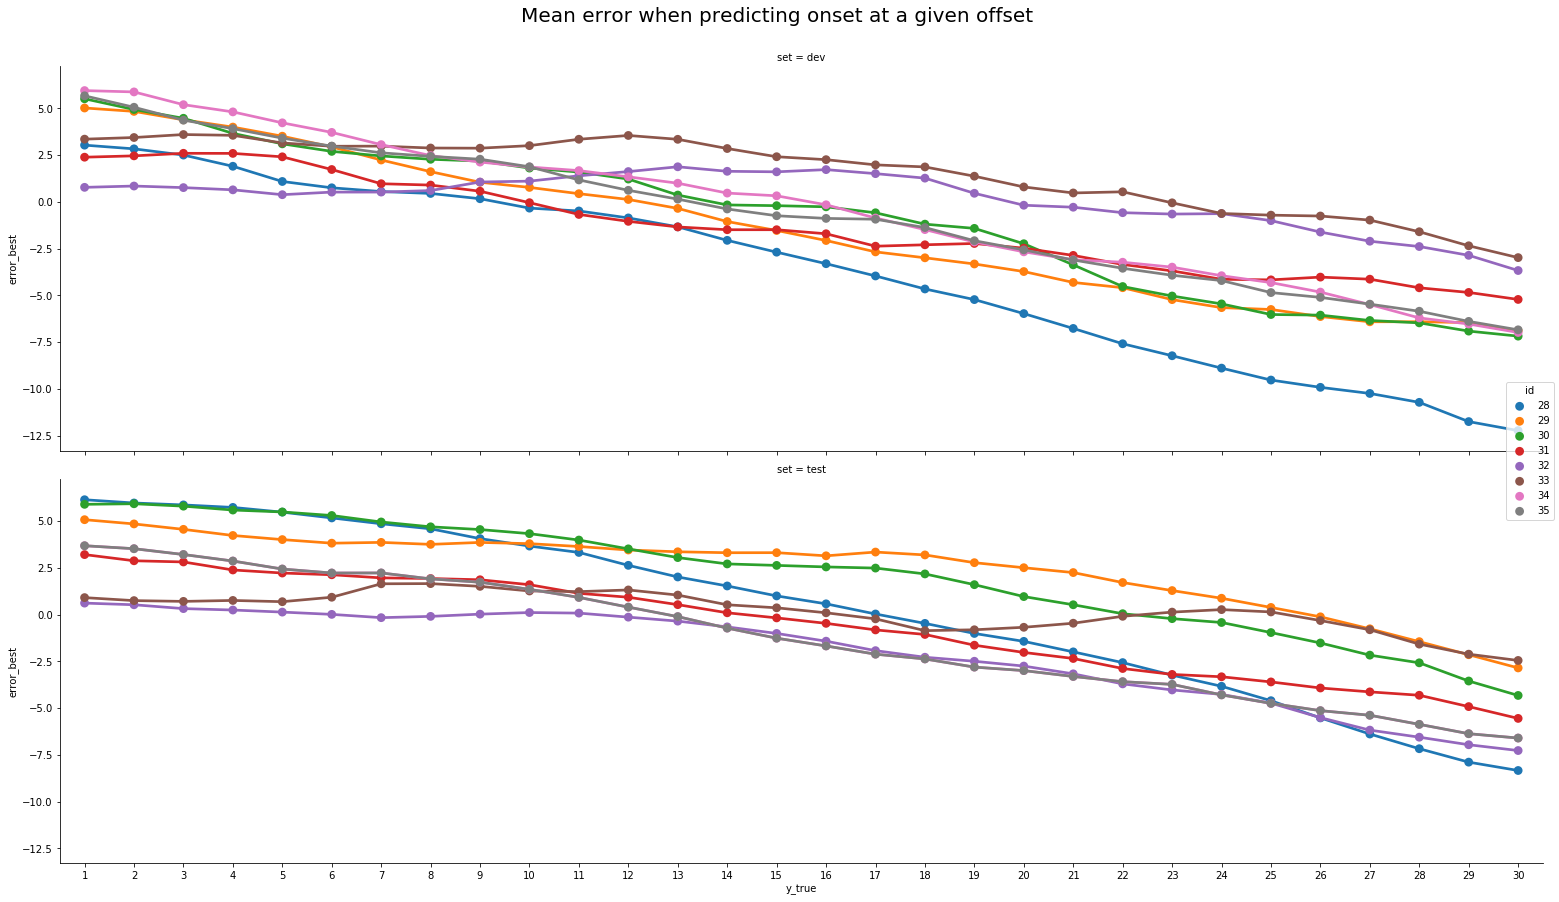

In [10]:
g = sns.factorplot(data=df, x='y_true', y='error_best', hue='id', row='set', aspect=3.5, size=6, ci=None)

ttl = g.fig.suptitle('Mean error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_error_offset.png')

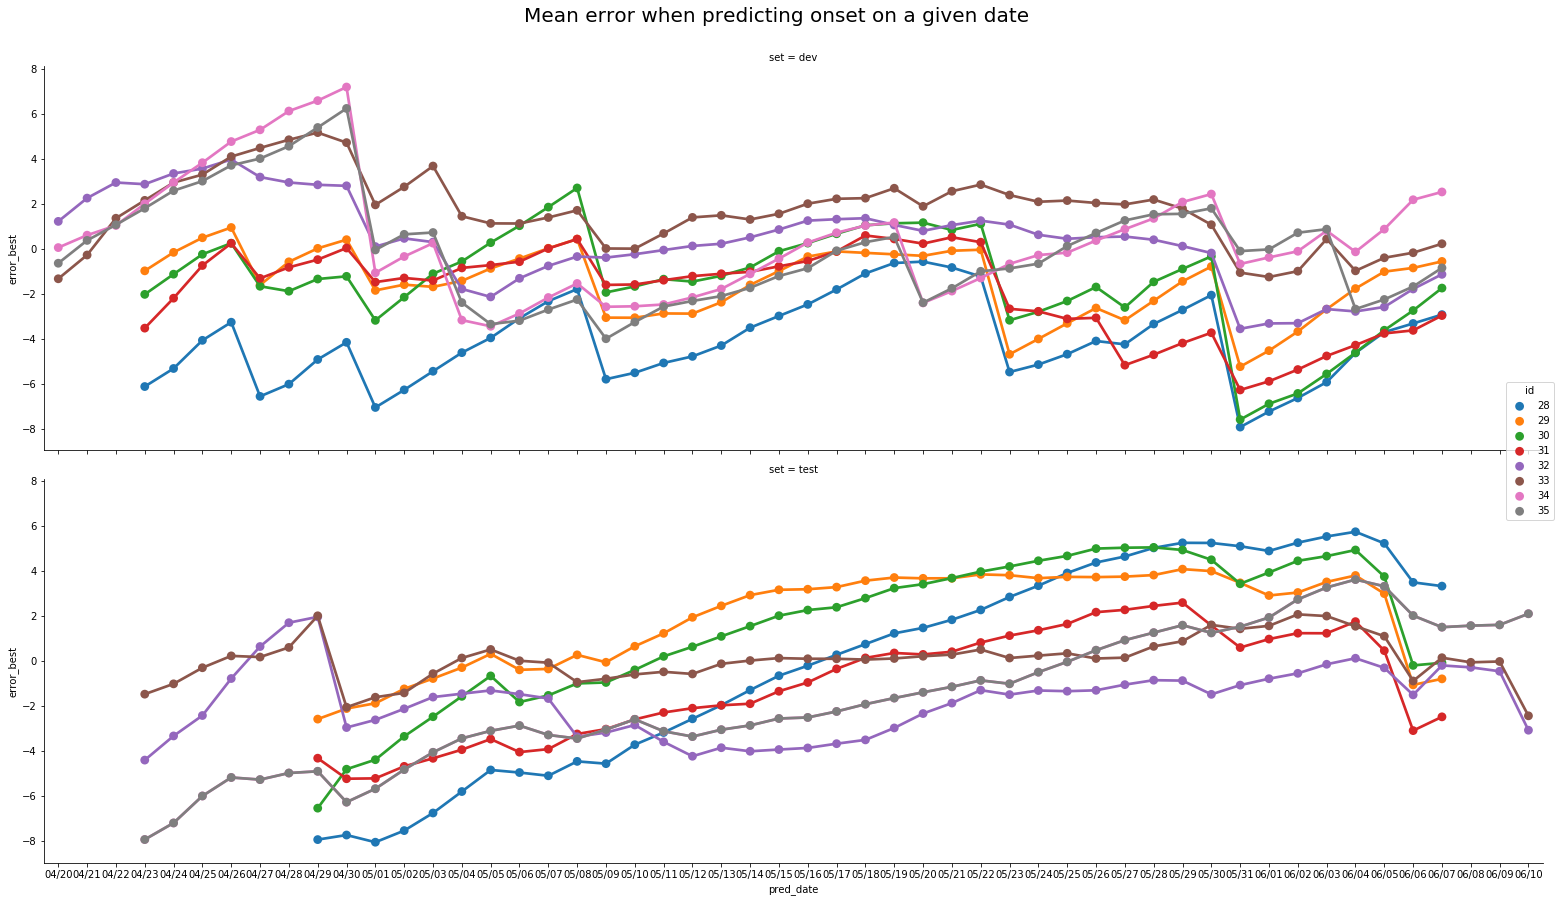

In [11]:
g = sns.factorplot(data=df, x='pred_date', y='error_best', hue='id', row='set', aspect=3.5, size=6, ci=None)

ttl = g.fig.suptitle('Mean error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_error_dates.png')

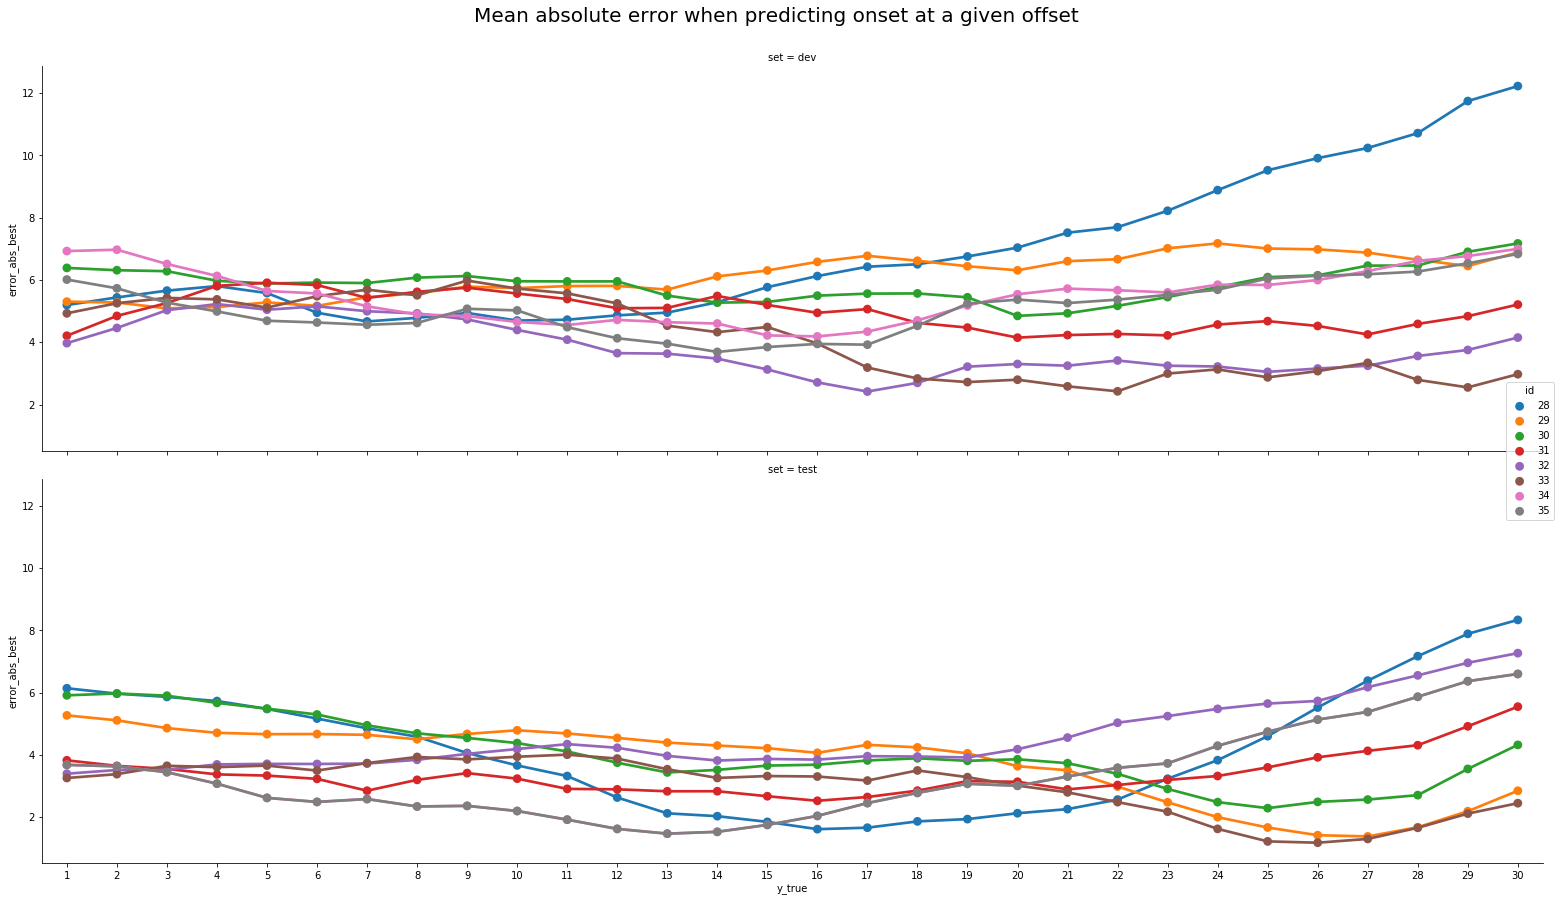

In [12]:
g = sns.factorplot(data=df, x='y_true', y='error_abs_best', hue='id', row='set', aspect=3.5, size=6, ci=None)

ttl = g.fig.suptitle('Mean absolute error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_accuracy_offset.png')

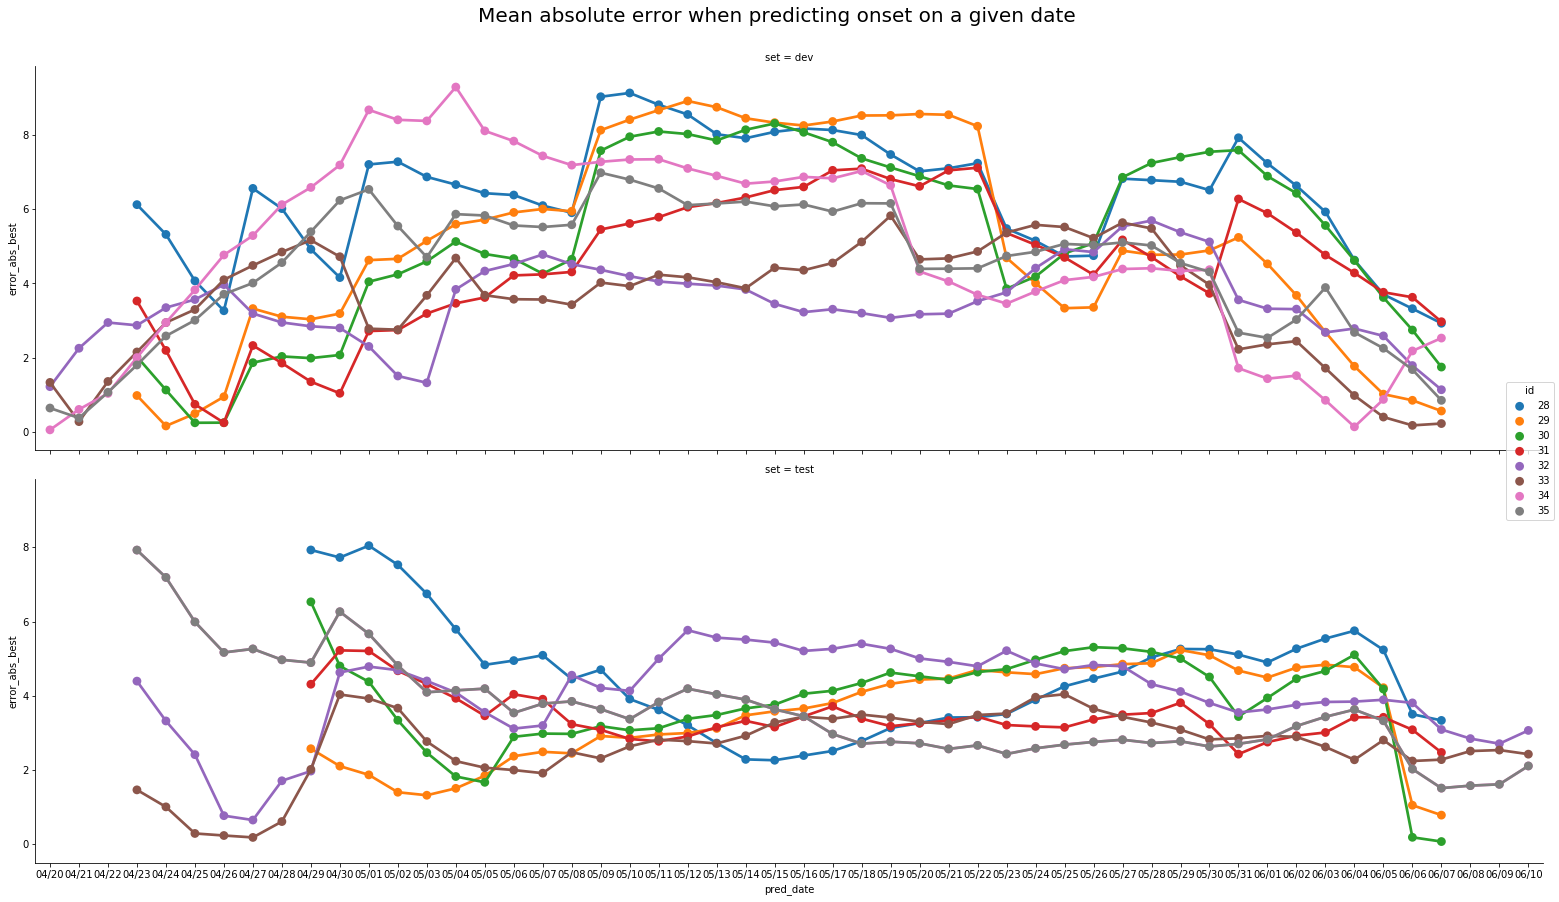

In [13]:
g = sns.factorplot(data=df, x='pred_date', y='error_abs_best', hue='id', row='set', aspect=3.5, size=6, ci=None)

ttl = g.fig.suptitle('Mean absolute error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_accuracy_dates.png')